In [27]:
import numpy as np

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [32]:
import pandas as pd


In [33]:
train_df=pd.read_csv("customer_churn_dataset-training-master.csv")

In [34]:
test_df = pd.read_csv("customer_churn_dataset-testing-master.csv")


In [35]:
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [36]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  str    
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  str    
 8   Contract Length    440832 non-null  str    
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), str(3)
memory usage: 40.4 MB


In [37]:
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [38]:
train_df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

Will remove the customerID and it is not an identid=fier therefore i feel wont be useful for the model

In [39]:
train_df = train_df.drop("CustomerID", axis=1)

In [40]:
train_df = train_df.dropna(subset=["Churn"])

In [41]:
X = train_df.drop("Churn", axis=1)
y = train_df["Churn"]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
X = train_df.drop("Churn", axis=1)
y = train_df["Churn"]

In [44]:
X = pd.get_dummies(X, drop_first=True)

In [45]:
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
print(X_train.dtype)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [48]:
print(X_train.dtypes)

Age                           float64
Tenure                        float64
Usage Frequency               float64
Support Calls                 float64
Payment Delay                 float64
Total Spend                   float64
Last Interaction              float64
Gender_Male                     int64
Subscription Type_Premium       int64
Subscription Type_Standard      int64
Contract Length_Monthly         int64
Contract Length_Quarterly       int64
dtype: object


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))

Random Forest Accuracy: 0.9996143681876439


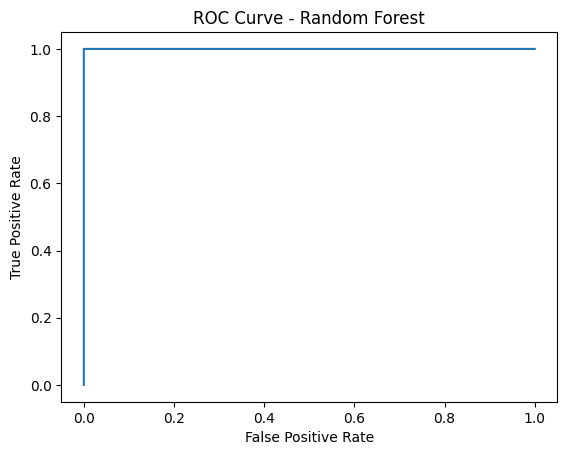

ROC AUC Score: 0.9999994683050428


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rf_probs = rf_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, rf_probs)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.show()

print("ROC AUC Score:", roc_auc_score(y_val, rf_probs))

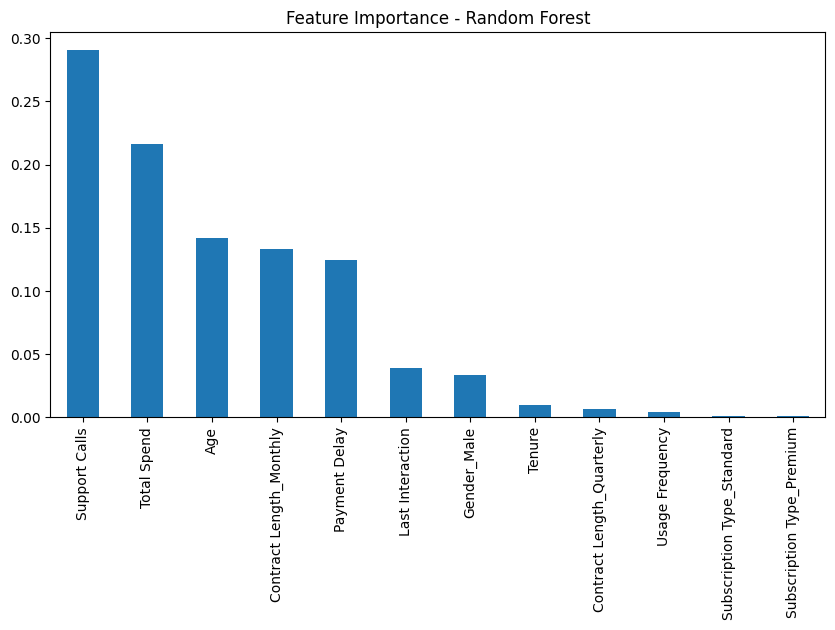

In [52]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
)

feature_importance.sort_values(ascending=False).plot(
    kind="bar",
    figsize=(10,5)
)

plt.title("Feature Importance - Random Forest")
plt.show()